# Chapter 1: The Machine Learning Landscape

**Book:** Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow (3rd Edition)

In [81]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display settings
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

# Plot settings
%matplotlib inline
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## What Is Machine Learning?

**Machine Learning**
- the science of programming computers so they can *learn from data*.
- field of study that gives computers the ability to learn *without being explicitly programmed*.

**Training set** - examples that system uses to learn

**Training instance (sample)** - each training example

**Model** - part of the system that learns and makes predictions

ML is great for:
- tradition approach requires long list of rules, or no good solution at all
- fluctuating environments
- to get insights about complex problems and data

## Types of Machine Learning Systems

<img src="images/ml_classification.jpg" width="900">

## Main Challenges of Machine Learning

**Bad Data**
- Insufficient amount of data
- Non-representative data (sampling noise/bias)
- Poor-quality data (errors, outliers, noise)
- Irrelevant features

**Bad Model**
- *Overfitting* - performs well on training data, but does not generalize well
    - simplify model
    - gather more data
    - reduce data noise
- *Underfitting* - too simple to learn the underlying data structure
    - more powerful model
    - better features
    - reduce model constraints

## Testing and Validating

**Validation set** - for choosing best hyperparameters

**Test set** - for testing final model

**Cross-validation** - using many small validation sets

**Train-dev set** (part of train data) - can be used if training on non-representative data

<img src="images/testing_validating.png" width="200">

---
# Practical Examples

## Linear Regression

In [82]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat["Life satisfaction"].values

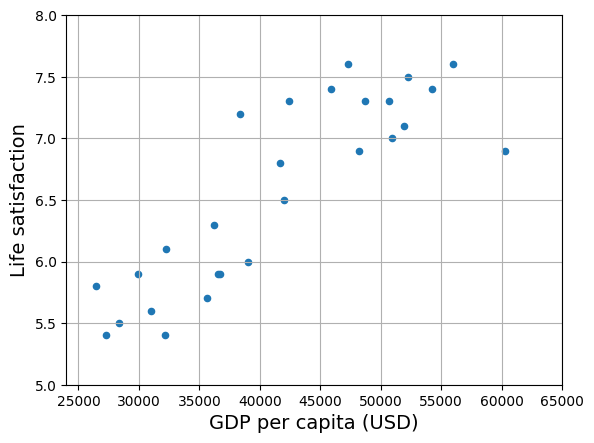

In [83]:
lifesat.plot(kind="scatter", x="GDP per capita (USD)", y="Life satisfaction", grid=True)
plt.axis([24000, 65000, 5, 8])
plt.show()

In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [85]:
X_sample = [[45000]]
y_sample = model.predict(X_sample)
y_sample

array([6.7996])

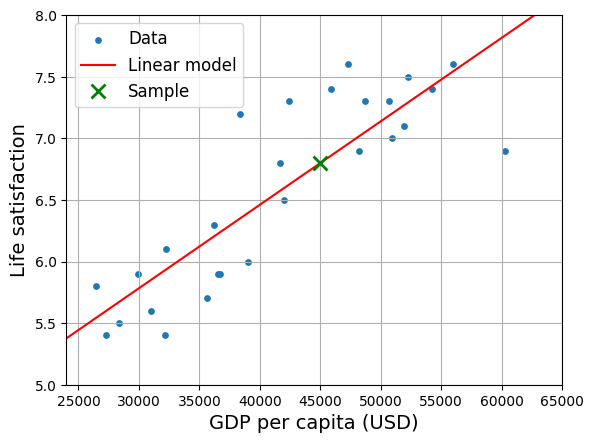

In [86]:
X_line = [[24000], [65000]]
y_line = model.predict(X_line)

plt.scatter(X, y, label="Data", s=15)
plt.plot(X_line, y_line, 'r-', label="Linear model")
plt.plot(X_sample, y_sample, 'gx', label="Sample", markersize=10, markeredgewidth=2)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.axis([24000, 65000, 5, 8])
plt.grid(True)
plt.legend()
plt.show()

## K-Nearest Neighbors

In [87]:
from sklearn.neighbors import KNeighborsRegressor

n_model_3 = KNeighborsRegressor(n_neighbors=3)
n_model_3.fit(X, y)

n_model_5 = KNeighborsRegressor(n_neighbors=5)
n_model_5.fit(X, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [88]:
n_3_sample_y = n_model_3.predict(X_sample)
n_5_sample_y = n_model_5.predict(X_sample)

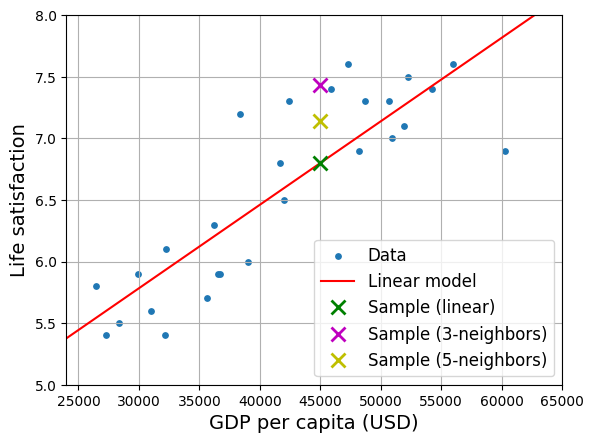

In [89]:
plt.scatter(X, y, label="Data", s=15)
plt.plot(X_line, y_line, 'r-', label="Linear model")
plt.plot(X_sample, y_sample, 'gx', label="Sample (linear)", markersize=10, markeredgewidth=2)
plt.plot(X_sample, n_3_sample_y, 'mx', label="Sample (3-neighbors)", markersize=10, markeredgewidth=2)
plt.plot(X_sample, n_5_sample_y, 'yx', label="Sample (5-neighbors)", markersize=10, markeredgewidth=2)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.axis([24000, 65000, 5, 8])
plt.grid(True)
plt.legend()
plt.show()